<a href="https://colab.research.google.com/github/adityasarve/Ai-project/blob/main/Last_Mile_Delivery__Optimization_Merging_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from datetime import datetime


In [ ]:
# Load datasets for each city
df_city1 = pd.read_csv('delivery_cq.csv')
df_city2 = pd.read_csv('delivery_delivery_jl.csv')
df_city3 = pd.read_csv('delivery_hz.csv')
df_city4 = pd.read_csv('delivery_sh.csv')
df_city5 = pd.read_csv('delivery_yt.csv')

In [ ]:
df_city1

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931346,408723,166,Chongqing,4855,106.48823,29.49533,60054,1,10-27 08:36:00,10-27 08:36:00,106.52756,29.49760,10-27 12:30:00,10-27 12:30:00,106.50547,29.49880,1027
931347,3133674,166,Chongqing,4855,106.48839,29.49522,60054,1,10-25 09:24:00,10-25 09:24:00,106.52752,29.49765,10-25 12:53:00,10-25 12:53:00,106.48840,29.49507,1025
931348,4469852,166,Chongqing,4855,106.48822,29.49530,60054,1,10-24 14:11:00,10-24 14:11:00,106.52755,29.49764,10-24 16:39:00,10-24 16:39:00,106.48843,29.49484,1024
931349,2140790,166,Chongqing,4855,106.48822,29.49537,60054,1,10-29 15:24:00,10-29 15:24:00,106.52746,29.49751,10-29 18:08:00,10-29 18:08:00,106.48854,29.49509,1029


In [ ]:
merged_df = pd.concat([df_city1, df_city2, df_city3, df_city4, df_city5], ignore_index=True)
merged_df

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514656,2512759,167,Yantai,1571,121.19537,36.78027,60137,1,07-03 15:14:00,07-03 15:14:00,121.20571,36.76358,07-03 17:33:00,07-03 17:33:00,121.19512,36.78016,703
4514657,3779171,167,Yantai,1571,121.19646,36.78103,60137,1,05-24 10:06:00,05-24 10:06:00,121.20567,36.76358,05-24 15:12:00,05-24 15:12:00,121.19635,36.78090,524
4514658,4198558,167,Yantai,3402,121.19515,36.78057,60137,1,05-01 15:13:00,05-01 15:13:00,121.20555,36.76358,05-01 16:06:00,05-01 16:06:00,121.19567,36.78372,501
4514659,1805034,167,Yantai,3402,121.19631,36.78100,60137,1,05-05 09:22:00,05-05 09:22:00,121.20561,36.76357,05-05 17:24:00,05-05 17:24:00,121.19639,36.78082,505


In [ ]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514661 entries, 0 to 4514660
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   region_id          int64  
 2   city               object 
 3   courier_id         int64  
 4   lng                float64
 5   lat                float64
 6   aoi_id             int64  
 7   aoi_type           int64  
 8   accept_time        object 
 9   accept_gps_time    object 
 10  accept_gps_lng     float64
 11  accept_gps_lat     float64
 12  delivery_time      object 
 13  delivery_gps_time  object 
 14  delivery_gps_lng   float64
 15  delivery_gps_lat   float64
 16  ds                 int64  
dtypes: float64(6), int64(6), object(5)
memory usage: 585.6+ MB
None


In [ ]:
merged_df.describe()

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat,ds
count,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.511284e+06,4.511284e+06,4.514661e+06,4.514661e+06,4.514661e+06
mean,2.257330e+06,7.381683e+01,2.385268e+03,1.178683e+02,3.084852e+01,2.998049e+04,4.355784e+00,1.178629e+02,3.083946e+01,1.178634e+02,3.084735e+01,8.112479e+02
std,1.303271e+06,4.538614e+01,1.390526e+03,5.822634e+00,1.928226e+00,1.729042e+04,5.527705e+00,5.853219e+00,1.916018e+00,5.867664e+00,1.937424e+00,1.653643e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.020849e+02,2.311348e+01,0.000000e+00,0.000000e+00,-9.000000e-05,-9.000000e-05,-9.000000e-05,-9.000000e-05,5.010000e+02
25%,1.128665e+06,3.600000e+01,1.206000e+03,1.199666e+02,3.012185e+01,1.487400e+04,1.000000e+00,1.199621e+02,3.010518e+01,1.199666e+02,3.012170e+01,7.030000e+02
50%,2.257330e+06,7.100000e+01,2.345000e+03,1.202321e+02,3.030657e+01,3.005500e+04,1.000000e+00,1.202476e+02,3.031297e+01,1.202317e+02,3.030687e+01,8.200000e+02
75%,3.385995e+06,1.110000e+02,3.588000e+03,1.214099e+02,3.118919e+01,4.446400e+04,8.000000e+00,1.214002e+02,3.118778e+01,1.214098e+02,3.118906e+01,9.290000e+02
max,4.514660e+06,1.670000e+02,4.876000e+03,1.268191e+02,4.422335e+01,6.014900e+04,1.500000e+01,1.266288e+02,4.394521e+01,1.397561e+02,4.576194e+01,1.031000e+03


In [ ]:
print(merged_df['city'].value_counts())

city
Hangzhou     1861600
Shanghai     1483864
Chongqing     931351
Yantai        206431
Jilin          31415
Name: count, dtype: int64


In [ ]:
merged_df = merged_df.drop_duplicates()
merged_df.to_csv('merged_city_data.csv', index=False)

In [ ]:

merged_df=pd.read_csv('merged_city_data.csv')

In [ ]:
merged_df.head()

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001


In [ ]:
#Data Cleaning
merged_df.isnull().sum()

,0
order_id,0
region_id,0
city,0
courier_id,0
lng,0
lat,0
aoi_id,0
aoi_type,0
accept_time,0
accept_gps_time,0


In [ ]:
missing_values = merged_df[['accept_time', 'delivery_time', 'lng', 'lat', 'courier_id']].isnull().sum()
print(missing_values)

accept_time      0
delivery_time    0
lng              0
lat              0
courier_id       0
dtype: int64


In [ ]:
merged_df = merged_df.dropna(subset=['accept_time', 'delivery_time'])

In [ ]:
mean_lat_lng = merged_df.groupby('city')[['lat', 'lng']].transform('mean')

In [ ]:
merged_df['lat'] = merged_df['lat'].fillna(mean_lat_lng['lat'])
merged_df['lng'] = merged_df['lng'].fillna(mean_lat_lng['lng'])

In [ ]:
duplicates = merged_df[merged_df.duplicated(subset='order_id', keep=False)]
duplicates


,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds


In [ ]:
#Verify Data Types

# Convert 'accept_time' to datetime
merged_df['accept_time'] = pd.to_datetime('2024-' + merged_df['accept_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
merged_df['delivery_time'] = pd.to_datetime('2024-' + merged_df['delivery_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


merged_df['lat'] = pd.to_numeric(merged_df['lat'], errors='coerce')
merged_df['lng'] = pd.to_numeric(merged_df['lng'], errors='coerce')

merged_df['aoi_type'] = merged_df['aoi_type'].astype('category')


print(merged_df.dtypes)

order_id                      int64
region_id                     int64
city                         object
courier_id                    int64
lng                         float64
lat                         float64
aoi_id                        int64
aoi_type                   category
accept_time          datetime64[ns]
accept_gps_time              object
accept_gps_lng              float64
accept_gps_lat              float64
delivery_time        datetime64[ns]
delivery_gps_time            object
delivery_gps_lng            float64
delivery_gps_lat            float64
ds                            int64
dtype: object


In [ ]:
merged_df

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,2024-10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,2024-10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,2024-09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,2024-09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,2024-06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,2024-06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,2024-09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,2024-09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,2024-10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,2024-10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514656,2512759,167,Yantai,1571,121.19537,36.78027,60137,1,2024-07-03 15:14:00,07-03 15:14:00,121.20571,36.76358,2024-07-03 17:33:00,07-03 17:33:00,121.19512,36.78016,703
4514657,3779171,167,Yantai,1571,121.19646,36.78103,60137,1,2024-05-24 10:06:00,05-24 10:06:00,121.20567,36.76358,2024-05-24 15:12:00,05-24 15:12:00,121.19635,36.78090,524
4514658,4198558,167,Yantai,3402,121.19515,36.78057,60137,1,2024-05-01 15:13:00,05-01 15:13:00,121.20555,36.76358,2024-05-01 16:06:00,05-01 16:06:00,121.19567,36.78372,501
4514659,1805034,167,Yantai,3402,121.19631,36.78100,60137,1,2024-05-05 09:22:00,05-05 09:22:00,121.20561,36.76357,2024-05-05 17:24:00,05-05 17:24:00,121.19639,36.78082,505


In [ ]:
# delivery duration in hours
merged_df['delivery_duration'] = (merged_df['delivery_time'] - merged_df['accept_time']).dt.total_seconds() / 3600
merged_df

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,2024-10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,2024-10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022,6.633333
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,2024-09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,2024-09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907,53.516667
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,2024-06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,2024-06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626,30.233333
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,2024-09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,2024-09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911,54.216667
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,2024-10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,2024-10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001,8.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514656,2512759,167,Yantai,1571,121.19537,36.78027,60137,1,2024-07-03 15:14:00,07-03 15:14:00,121.20571,36.76358,2024-07-03 17:33:00,07-03 17:33:00,121.19512,36.78016,703,2.316667
4514657,3779171,167,Yantai,1571,121.19646,36.78103,60137,1,2024-05-24 10:06:00,05-24 10:06:00,121.20567,36.76358,2024-05-24 15:12:00,05-24 15:12:00,121.19635,36.78090,524,5.100000
4514658,4198558,167,Yantai,3402,121.19515,36.78057,60137,1,2024-05-01 15:13:00,05-01 15:13:00,121.20555,36.76358,2024-05-01 16:06:00,05-01 16:06:00,121.19567,36.78372,501,0.883333
4514659,1805034,167,Yantai,3402,121.19631,36.78100,60137,1,2024-05-05 09:22:00,05-05 09:22:00,121.20561,36.76357,2024-05-05 17:24:00,05-05 17:24:00,121.19639,36.78082,505,8.033333


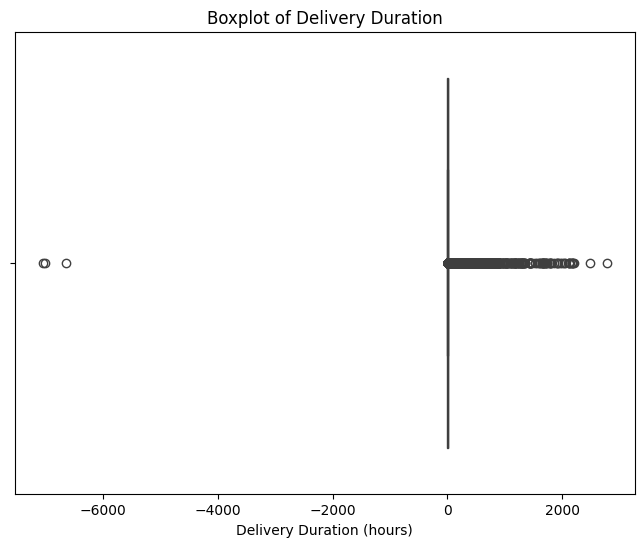

In [ ]:


# Boxplot for delivery duration
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['delivery_duration'])
plt.title('Boxplot of Delivery Duration')
plt.xlabel('Delivery Duration (hours)')
plt.show()

In [ ]:
#Z-SCORE-threshold=3

from scipy.stats import zscore
merged_df['z_score'] = zscore(merged_df['delivery_duration'])

outliers_z = merged_df[(merged_df['z_score'] > 3) | (merged_df['z_score'] < -3)]

# Drop outliers
merged_df = merged_df[(merged_df['z_score'] <= 3) & (merged_df['z_score'] >= -3)]

merged_df = merged_df.drop(columns=['z_score'])

In [ ]:
outliers_z

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration,z_score
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,2024-09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,2024-09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907,53.516667,3.875342
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,2024-09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,2024-09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911,54.216667,3.929146
5,659996,10,Chongqing,3605,108.71644,30.90470,50,14,2024-08-08 19:01:00,08-08 19:01:00,108.71796,30.95630,2024-08-11 10:50:00,08-11 10:50:00,108.71632,30.90479,808,63.816667,4.667019
9,965648,10,Chongqing,3605,108.71554,30.90256,50,14,2024-08-10 10:52:00,08-10 10:52:00,108.71797,30.95630,2024-08-12 15:50:00,08-12 15:50:00,108.71542,30.90243,810,52.966667,3.833068
10,4486215,10,Chongqing,3605,108.71543,30.90390,50,14,2024-10-17 09:39:00,10-17 09:39:00,108.71816,30.95588,2024-10-19 16:58:00,10-19 16:58:00,108.71545,30.90394,1017,55.316667,4.013694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499264,2441597,162,Yantai,1604,121.84661,37.42251,58053,14,2024-10-23 10:07:00,10-23 10:07:00,121.58090,37.39160,2024-10-25 20:31:00,10-25 20:31:00,121.84662,37.42261,1023,58.400000,4.250684
4499268,1357369,162,Yantai,3611,121.40092,37.14085,58175,14,2024-09-12 09:55:00,09-12 09:55:00,121.58085,37.39166,2024-09-14 21:06:00,09-14 21:06:00,121.40097,37.14076,912,59.183333,4.310893
4499279,2767806,162,Yantai,1970,121.26799,37.21592,58268,14,2024-09-21 10:14:00,09-21 10:14:00,121.58090,37.39163,2024-09-23 20:19:00,09-23 20:19:00,121.26785,37.21590,921,58.083333,4.226345
4499286,1553978,162,Yantai,1970,121.26772,37.21554,58268,14,2024-10-02 10:56:00,10-02 10:56:00,121.58088,37.39166,2024-10-05 20:21:00,10-05 20:21:00,121.26776,37.21563,1002,81.416667,6.019788


In [ ]:

merged_df

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,2024-10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,2024-10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022,6.633333
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,2024-06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,2024-06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626,30.233333
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,2024-10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,2024-10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001,8.633333
6,4481765,10,Chongqing,3605,108.71605,30.90410,50,14,2024-09-30 10:00:00,09-30 10:00:00,108.71824,30.95583,2024-09-30 16:38:00,09-30 16:38:00,108.71429,30.90416,930,6.633333
7,2365752,10,Chongqing,3605,108.71633,30.90266,50,14,2024-09-30 10:00:00,09-30 10:00:00,108.71826,30.95585,2024-09-30 18:38:00,09-30 18:38:00,108.71425,30.90416,930,8.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514656,2512759,167,Yantai,1571,121.19537,36.78027,60137,1,2024-07-03 15:14:00,07-03 15:14:00,121.20571,36.76358,2024-07-03 17:33:00,07-03 17:33:00,121.19512,36.78016,703,2.316667
4514657,3779171,167,Yantai,1571,121.19646,36.78103,60137,1,2024-05-24 10:06:00,05-24 10:06:00,121.20567,36.76358,2024-05-24 15:12:00,05-24 15:12:00,121.19635,36.78090,524,5.100000
4514658,4198558,167,Yantai,3402,121.19515,36.78057,60137,1,2024-05-01 15:13:00,05-01 15:13:00,121.20555,36.76358,2024-05-01 16:06:00,05-01 16:06:00,121.19567,36.78372,501,0.883333
4514659,1805034,167,Yantai,3402,121.19631,36.78100,60137,1,2024-05-05 09:22:00,05-05 09:22:00,121.20561,36.76357,2024-05-05 17:24:00,05-05 17:24:00,121.19639,36.78082,505,8.033333


In [ ]:
#Detect Geospatial Anomalies
invalid_geo = merged_df[(merged_df['lat'] < -90) | (merged_df['lat'] > 90) |
                        (merged_df['lng'] < -180) | (merged_df['lng'] > 180)]

print(f"Invalid geospatial entries: {invalid_geo.shape[0]}")
print(invalid_geo)

merged_df = merged_df[(merged_df['lat'] >= -90) & (merged_df['lat'] <= 90) &
                      (merged_df['lng'] >= -180) & (merged_df['lng'] <= 180)]

Invalid geospatial entries: 0
Empty DataFrame
Columns: [order_id, region_id, city, courier_id, lng, lat, aoi_id, aoi_type, accept_time, accept_gps_time, accept_gps_lng, accept_gps_lat, delivery_time, delivery_gps_time, delivery_gps_lng, delivery_gps_lat, ds, delivery_duration]
Index: []


In [ ]:
# One-Hot Encoding
merged_df = pd.get_dummies(merged_df, columns=['aoi_type'], drop_first=True)

merged_df = pd.get_dummies(merged_df, columns=['city'], drop_first=True)

In [ ]:
merged_df[merged_df.select_dtypes(include=['bool']).columns] = merged_df.select_dtypes(include=['bool']).astype(int)

In [ ]:
merged_df.head()

,order_id,region_id,courier_id,lng,lat,aoi_id,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,...,aoi_type_10,aoi_type_11,aoi_type_12,aoi_type_13,aoi_type_14,aoi_type_15,city_Hangzhou,city_Jilin,city_Shanghai,city_Yantai
0,2031782,10,73,108.71571,30.90228,50,2024-10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,...,0,0,0,0,1,0,0,0,0,0
2,4056800,10,3605,108.71645,30.90259,50,2024-06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,...,0,0,0,0,1,0,0,0,0,0
4,2752329,10,3605,108.71608,30.90409,50,2024-10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,...,0,0,0,0,1,0,0,0,0,0
6,4481765,10,3605,108.71605,30.90410,50,2024-09-30 10:00:00,09-30 10:00:00,108.71824,30.95583,...,0,0,0,0,1,0,0,0,0,0
7,2365752,10,3605,108.71633,30.90266,50,2024-09-30 10:00:00,09-30 10:00:00,108.71826,30.95585,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
merged_df.columns

Index(['order_id', 'region_id', 'courier_id', 'lng', 'lat', 'aoi_id',
       'accept_time', 'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat',
       'delivery_time', 'delivery_gps_time', 'delivery_gps_lng',
       'delivery_gps_lat', 'ds', 'delivery_duration', 'aoi_type_1',
       'aoi_type_2', 'aoi_type_3', 'aoi_type_4', 'aoi_type_5', 'aoi_type_6',
       'aoi_type_7', 'aoi_type_8', 'aoi_type_9', 'aoi_type_10', 'aoi_type_11',
       'aoi_type_12', 'aoi_type_13', 'aoi_type_14', 'aoi_type_15',
       'city_Hangzhou', 'city_Jilin', 'city_Shanghai', 'city_Yantai'],
      dtype='object')

In [ ]:
merged_df['distance'] = np.sqrt((merged_df['delivery_gps_lng'] - merged_df['accept_gps_lng'])**2 +
                                (merged_df['delivery_gps_lat'] - merged_df['accept_gps_lat'])**2)
merged_df['distance']


,distance
0,0.055776
2,0.053861
4,0.052169
6,0.051821
7,0.051845
...,...
4514656,0.019673
4514657,0.019668
4514658,0.022433
4514659,0.019559


In [ ]:
merged_df[merged_df.select_dtypes(include=['int','float']).columns]

,order_id,region_id,courier_id,lng,lat,aoi_id,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat,...,aoi_type_11,aoi_type_12,aoi_type_13,aoi_type_14,aoi_type_15,city_Hangzhou,city_Jilin,city_Shanghai,city_Yantai,distance
0,2031782,10,73,108.71571,30.90228,50,108.71826,30.95587,108.66361,30.96702,...,0,0,0,1,0,0,0,0,0,0.055776
2,4056800,10,3605,108.71645,30.90259,50,108.71798,30.95635,108.71647,30.90251,...,0,0,0,1,0,0,0,0,0,0.053861
4,2752329,10,3605,108.71608,30.90409,50,108.71820,30.95598,108.71413,30.90397,...,0,0,0,1,0,0,0,0,0,0.052169
6,4481765,10,3605,108.71605,30.90410,50,108.71824,30.95583,108.71429,30.90416,...,0,0,0,1,0,0,0,0,0,0.051821
7,2365752,10,3605,108.71633,30.90266,50,108.71826,30.95585,108.71425,30.90416,...,0,0,0,1,0,0,0,0,0,0.051845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514656,2512759,167,1571,121.19537,36.78027,60137,121.20571,36.76358,121.19512,36.78016,...,0,0,0,0,0,0,0,0,1,0.019673
4514657,3779171,167,1571,121.19646,36.78103,60137,121.20567,36.76358,121.19635,36.78090,...,0,0,0,0,0,0,0,0,1,0.019668
4514658,4198558,167,3402,121.19515,36.78057,60137,121.20555,36.76358,121.19567,36.78372,...,0,0,0,0,0,0,0,0,1,0.022433
4514659,1805034,167,3402,121.19631,36.78100,60137,121.20561,36.76357,121.19639,36.78082,...,0,0,0,0,0,0,0,0,1,0.019559


In [ ]:
merged_df['delivery_duration']

,delivery_duration
0,6.633333
2,30.233333
4,8.633333
6,6.633333
7,8.633333
...,...
4514656,2.316667
4514657,5.100000
4514658,0.883333
4514659,8.033333


In [ ]:
#NORMALIZE
scaler = MinMaxScaler()
numerical_columns = ['delivery_duration']
merged_df[numerical_columns] = scaler.fit_transform(merged_df[numerical_columns])

In [ ]:
merged_df['delivery_duration']

,delivery_duration
0,0.157499
2,0.717847
4,0.204986
6,0.157499
7,0.204986
...,...
4514656,0.055006
4514657,0.121092
4514658,0.020973
4514659,0.190740


In [ ]:
# Save the cleaned dataset to a CSV file
merged_df.to_csv('cleaned_delivery_data.csv', index=False)

# Data Preprocessing

In [ ]:
df = pd.read_csv('merged_delivery_data.csv')
df.head(10)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,2031782,10,Chongqing,73,108.71571,30.90228,50,14,10-22 10:26:00,10-22 10:26:00,108.71826,30.95587,10-22 17:04:00,10-22 17:04:00,108.66361,30.96702,1022
1,4285071,10,Chongqing,3605,108.71639,30.90269,50,14,09-07 10:13:00,09-07 10:13:00,108.71791,30.95635,09-09 15:44:00,09-09 15:44:00,108.71644,30.90266,907
2,4056800,10,Chongqing,3605,108.71645,30.90259,50,14,06-26 09:49:00,06-26 09:49:00,108.71798,30.95635,06-27 16:03:00,06-27 16:03:00,108.71647,30.90251,626
3,3589481,10,Chongqing,3605,108.71650,30.90347,50,14,09-11 11:01:00,09-11 11:01:00,108.71823,30.95596,09-13 17:14:00,09-13 17:14:00,108.71650,30.90341,911
4,2752329,10,Chongqing,3605,108.71608,30.90409,50,14,10-01 09:52:00,10-01 09:52:00,108.71820,30.95598,10-01 18:30:00,10-01 18:30:00,108.71413,30.90397,1001
5,659996,10,Chongqing,3605,108.71644,30.90470,50,14,08-08 19:01:00,08-08 19:01:00,108.71796,30.95630,08-11 10:50:00,08-11 10:50:00,108.71632,30.90479,808
6,4481765,10,Chongqing,3605,108.71605,30.90410,50,14,09-30 10:00:00,09-30 10:00:00,108.71824,30.95583,09-30 16:38:00,09-30 16:38:00,108.71429,30.90416,930
7,2365752,10,Chongqing,3605,108.71633,30.90266,50,14,09-30 10:00:00,09-30 10:00:00,108.71826,30.95585,09-30 18:38:00,09-30 18:38:00,108.71425,30.90416,930
8,20671,10,Chongqing,3605,108.71643,30.90253,50,14,05-20 10:06:00,05-20 10:06:00,108.71795,30.95621,05-21 15:30:00,05-21 15:30:00,108.71643,30.90250,520
9,965648,10,Chongqing,3605,108.71554,30.90256,50,14,08-10 10:52:00,08-10 10:52:00,108.71797,30.95630,08-12 15:50:00,08-12 15:50:00,108.71542,30.90243,810


In [ ]:
df.shape

(4514661, 17)

In [ ]:
df['city'].unique()

array(['Chongqing', 'Jilin', 'Hangzhou', 'Shanghai', 'Yantai'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514661 entries, 0 to 4514660
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   region_id          int64  
 2   city               object 
 3   courier_id         int64  
 4   lng                float64
 5   lat                float64
 6   aoi_id             int64  
 7   aoi_type           int64  
 8   accept_time        object 
 9   accept_gps_time    object 
 10  accept_gps_lng     float64
 11  accept_gps_lat     float64
 12  delivery_time      object 
 13  delivery_gps_time  object 
 14  delivery_gps_lng   float64
 15  delivery_gps_lat   float64
 16  ds                 int64  
dtypes: float64(6), int64(6), object(5)
memory usage: 585.6+ MB


In [ ]:
df[['accept_time', 'delivery_time']].sample(5)

,accept_time,delivery_time
2489714,07-18 08:03:00,07-18 11:11:00
4327045,05-08 08:51:00,05-08 16:06:00
2800097,09-27 16:03:00,09-27 19:41:00
2609496,06-18 16:18:00,06-18 17:04:00
1431085,10-13 16:14:00,10-13 18:10:00


In [ ]:
df.describe()

,order_id,region_id,courier_id,lng,lat,aoi_id,aoi_type,accept_gps_lng,accept_gps_lat,delivery_gps_lng,delivery_gps_lat,ds
count,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.514661e+06,4.511284e+06,4.511284e+06,4.514661e+06,4.514661e+06,4.514661e+06
mean,2.257330e+06,7.381683e+01,2.385268e+03,1.178683e+02,3.084852e+01,2.998049e+04,4.355784e+00,1.178629e+02,3.083946e+01,1.178634e+02,3.084735e+01,8.112479e+02
std,1.303271e+06,4.538614e+01,1.390526e+03,5.822634e+00,1.928226e+00,1.729042e+04,5.527705e+00,5.853219e+00,1.916018e+00,5.867664e+00,1.937424e+00,1.653643e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.020849e+02,2.311348e+01,0.000000e+00,0.000000e+00,-9.000000e-05,-9.000000e-05,-9.000000e-05,-9.000000e-05,5.010000e+02
25%,1.128665e+06,3.600000e+01,1.206000e+03,1.199666e+02,3.012185e+01,1.487400e+04,1.000000e+00,1.199621e+02,3.010518e+01,1.199666e+02,3.012170e+01,7.030000e+02
50%,2.257330e+06,7.100000e+01,2.345000e+03,1.202321e+02,3.030657e+01,3.005500e+04,1.000000e+00,1.202476e+02,3.031297e+01,1.202317e+02,3.030687e+01,8.200000e+02
75%,3.385995e+06,1.110000e+02,3.588000e+03,1.214099e+02,3.118919e+01,4.446400e+04,8.000000e+00,1.214002e+02,3.118778e+01,1.214098e+02,3.118906e+01,9.290000e+02
max,4.514660e+06,1.670000e+02,4.876000e+03,1.268191e+02,4.422335e+01,6.014900e+04,1.500000e+01,1.266288e+02,4.394521e+01,1.397561e+02,4.576194e+01,1.031000e+03


In [ ]:
#checking counts
df.count().to_frame(name='Count_Rows')

,Count_Rows
order_id,4514661
region_id,4514661
city,4514661
courier_id,4514661
lng,4514661
lat,4514661
aoi_id,4514661
aoi_type,4514661
accept_time,4514661
accept_gps_time,4514661


## Data Cleaning
##### Handling Missing Values
##### Checkig Duplicates
##### Verifing Data Types

In [ ]:
#checking missing values
df.isnull().sum()

,0
order_id,0
region_id,0
city,0
courier_id,0
lng,0
lat,0
aoi_id,0
aoi_type,0
accept_time,0
accept_gps_time,0


In [ ]:
# Checking for Missing Values in Essential Columns from gitbook
df[['accept_time', 'delivery_time', 'lng', 'lat', 'courier_id']].isnull().sum().to_frame(name='Essential Missing Values')

,Essential Missing Values
accept_time,0
delivery_time,0
lng,0
lat,0
courier_id,0


In [ ]:
# Impute missing 'accept_gps_lng' and 'accept_gps_lat' values with the mean of their corresponding city groups
df['accept_gps_lng'] = df.groupby('city')['accept_gps_lng'].transform(lambda x: x.fillna(x.mean()))
df['accept_gps_lat'] = df.groupby('city')['accept_gps_lat'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
#verifying missing
df.isnull().sum()

,0
order_id,0
region_id,0
city,0
courier_id,0
lng,0
lat,0
aoi_id,0
aoi_type,0
accept_time,0
accept_gps_time,0


In [ ]:
#checking duplicate.
df[df.duplicated()]

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds


In [ ]:
# converting dtypes
df['accept_time'] = pd.to_datetime('2024-' + df['accept_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['accept_gps_time'] = pd.to_datetime('2024-' + df['accept_gps_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['delivery_time'] = pd.to_datetime('2024-' + df['delivery_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['delivery_gps_time'] = pd.to_datetime('2024-' + df['delivery_gps_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['lng'] = pd.to_numeric(df['lng'], errors='coerce')

df['aoi_type'] = df['aoi_type'].astype('category')
df.dtypes

,0
order_id,int64
region_id,int64
city,object
courier_id,int64
lng,float64
lat,float64
aoi_id,int64
aoi_type,category
accept_time,datetime64[ns]
accept_gps_time,datetime64[ns]


In [ ]:
df.sample(5)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
732404,4330573,153,Chongqing,1537,106.56809,29.66967,53019,1,2024-06-20 14:22:00,2024-06-20 14:22:00,106.56431,29.67278,2024-06-20 17:20:00,2024-06-20 17:20:00,106.56838,29.66922,620
3332384,618908,33,Shanghai,3575,121.33396,31.26674,3436,1,2024-06-16 21:58:00,2024-06-16 21:58:00,121.35085,31.26941,2024-06-16 22:03:00,2024-06-16 22:03:00,121.33329,31.26636,616
3561994,3868343,45,Shanghai,669,121.52903,31.06103,17284,1,2024-08-05 09:17:00,2024-08-05 09:17:00,121.52964,31.02349,2024-08-05 12:47:00,2024-08-05 12:47:00,121.52835,31.06201,805
415508,3530932,127,Chongqing,159,106.58073,29.55705,35027,0,2024-09-30 08:36:00,2024-09-30 08:36:00,106.57866,29.55051,2024-09-30 09:54:00,2024-09-30 09:54:00,106.58067,29.55706,930
3225112,4373191,25,Shanghai,755,121.54451,31.20216,8610,1,2024-10-29 16:04:00,2024-10-29 16:04:00,121.56027,31.18908,2024-10-29 17:22:00,2024-10-29 17:22:00,121.54652,31.20004,1029


### Adding & Validating NEW columns: `delivery_duration` And `distance` columns

In [ ]:
#adding duration column
df['delivery_duration'] = df['delivery_time'] - df['accept_time']

In [ ]:
df['delivery_duration'].describe()

,delivery_duration
count,4514661
mean,0 days 03:05:49.485815214
std,0 days 13:00:37.288630943
min,-294 days +08:23:00
25%,0 days 00:56:00
50%,0 days 01:45:00
75%,0 days 03:13:00
max,115 days 14:59:00


In [ ]:
#identifing rows with negative durations
negative_durations = df[df['delivery_duration'] < pd.Timedelta(0)]
negative_durations

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration
440298,3739029,131,Chongqing,2954,106.19835,29.49296,28470,14,2024-10-31 10:57:00,2024-10-31 10:57:00,106.21016,29.55476,2024-01-11 19:20:00,2024-01-11 19:20:00,106.19901,29.49442,1031,-294 days +08:23:00
518410,3212380,135,Chongqing,486,107.80753,30.66992,55255,14,2024-10-31 12:14:00,2024-10-31 12:14:00,107.74910,30.66363,2024-01-13 14:16:00,2024-01-13 14:16:00,107.75239,30.67711,1031,-292 days +02:02:00
522559,3956975,136,Chongqing,3893,106.31756,29.52306,57605,14,2024-10-22 17:54:00,2024-10-22 17:54:00,106.36630,29.48668,2024-01-19 12:56:00,2024-01-19 12:56:00,106.31752,29.52306,1022,-278 days +19:02:00


In [ ]:
#removing rows with negative durations
df = df[df['delivery_duration'] >= pd.Timedelta(0)]

# Verifing again
df['delivery_duration'].describe()

,delivery_duration
count,4514658
mean,0 days 03:06:06.004680753
std,0 days 11:43:43.454804323
min,0 days 00:00:00
25%,0 days 00:56:00
50%,0 days 01:45:00
75%,0 days 03:13:00
max,115 days 14:59:00


In [ ]:
#doing the same thing with \\ delivery_gps_time and accept_gps_time
#adding duration_GPS_time column
df['duration_gps_time'] = df['delivery_gps_time'] - df['accept_gps_time']

negative_durations = df[df['duration_gps_time'] < pd.Timedelta(0)]
negative_durations

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration,duration_gps_time


In [ ]:
df = df.drop('duration_gps_time', axis=1)
df.sample(5)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration
377878,3180385,123,Chongqing,2246,106.33301,29.62546,37237,1,2024-10-07 16:37:00,2024-10-07 16:37:00,106.34033,29.62973,2024-10-07 16:55:00,2024-10-07 16:55:00,106.33305,29.62575,1007,0 days 00:18:00
811307,3605130,158,Chongqing,1401,106.53399,29.64459,15074,1,2024-10-27 13:50:00,2024-10-27 13:50:00,106.52139,29.62353,2024-10-27 15:44:00,2024-10-27 15:44:00,106.53348,29.64443,1027,0 days 01:54:00
152178,2699808,74,Chongqing,1882,106.48143,29.53642,48704,1,2024-10-24 14:51:00,2024-10-24 14:51:00,106.48286,29.54317,2024-10-24 15:58:00,2024-10-24 15:58:00,106.48134,29.53719,1024,0 days 01:07:00
66484,3390168,40,Chongqing,942,106.49914,29.54341,5304,0,2024-09-30 15:14:00,2024-09-30 15:14:00,106.50126,29.53609,2024-09-30 16:55:00,2024-09-30 16:55:00,106.49873,29.54304,930,0 days 01:41:00
4354940,3340698,111,Yantai,1636,121.25524,37.57050,10787,1,2024-06-01 11:08:00,2024-06-01 11:08:00,121.28254,37.55113,2024-06-01 14:02:00,2024-06-01 14:02:00,121.24531,37.55968,601,0 days 02:54:00


In [ ]:
#adding distance column between acceptance and pickup
df['distance'] = np.sqrt((df['delivery_gps_lng'] - df['accept_gps_lng'])**2 +
                         (df['delivery_gps_lat'] - df['accept_gps_lat'])**2)

# Display the DataFrame to verify the new 'distance' column
df.sample(5)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration,duration_gps_time,distance
1467011,3803313,35,Hangzhou,2275,120.17719,30.28198,55193,14,2024-05-22 08:27:00,2024-05-22 08:27:00,120.17382,30.29722,2024-05-22 09:00:00,2024-05-22 09:00:00,120.17848,30.28210,522,0 days 00:33:00,0 days 00:33:00,0.015822
1475355,866900,36,Hangzhou,4662,120.26600,30.10166,5051,14,2024-08-13 09:45:00,2024-08-13 09:45:00,120.25556,30.05543,2024-08-13 12:39:00,2024-08-13 12:39:00,120.26604,30.10184,813,0 days 02:54:00,0 days 02:54:00,0.047579
2989214,1677032,8,Shanghai,4327,121.51568,31.13744,8783,1,2024-06-11 20:24:00,2024-06-11 20:24:00,121.49364,31.13889,2024-06-11 21:25:00,2024-06-11 21:25:00,121.51713,31.13953,611,0 days 01:01:00,0 days 01:01:00,0.023499
2589718,1751205,117,Hangzhou,1328,120.04673,30.17017,29501,14,2024-10-16 15:36:00,2024-10-16 15:36:00,120.06883,30.17441,2024-10-16 16:30:00,2024-10-16 16:30:00,120.04582,30.16962,1016,0 days 00:54:00,0 days 00:54:00,0.023503
134932,993844,74,Chongqing,4646,106.48586,29.53806,15879,1,2024-10-20 08:25:00,2024-10-20 08:25:00,106.48288,29.54313,2024-10-20 08:49:00,2024-10-20 08:49:00,106.48630,29.53778,1020,0 days 00:24:00,0 days 00:24:00,0.006350


In [ ]:
df['distance']

,distance
0,0.055776
1,0.053710
2,0.053861
3,0.052578
4,0.052169
...,...
4514656,0.019673
4514657,0.019668
4514658,0.022433
4514659,0.019559


In [ ]:
df['distance'].describe()

,distance
count,4.514658e+06
mean,3.584109e-02
std,9.933152e-01
min,0.000000e+00
25%,1.107610e-02
50%,1.878826e-02
75%,3.136084e-02
max,1.339792e+02


## Outlier Detection

- #### Delivery Duration : Identifing abnormally long or short delivery durations.

In [ ]:
# Calculating Q1 and Q3
Q1 = df['delivery_duration'].quantile(0.25)
Q3 = df['delivery_duration'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


lower_bound, upper_bound

(Timedelta('-1 days +21:30:30'), Timedelta('0 days 06:38:30'))

In [ ]:
# Filtering out outliers
# df = df[(df['task_duration'] >= lower_bound) & (df['task_duration'] <= upper_bound)]
df = df[df['delivery_duration'].between(lower_bound, upper_bound)]
df.sample(5)

,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration,duration_gps_time,distance
3454512,2148059,42,Shanghai,3769,121.52009,31.17604,18590,14,2024-09-23 14:47:00,2024-09-23 14:47:00,121.53076,31.18778,2024-09-23 14:58:00,2024-09-23 14:58:00,121.52014,31.17614,923,0 days 00:11:00,0 days 00:11:00,0.015757
2598492,3127761,117,Hangzhou,3394,120.07003,30.15913,38028,14,2024-08-26 15:09:00,2024-08-26 15:09:00,120.06882,30.17441,2024-08-26 18:31:00,2024-08-26 18:31:00,120.06986,30.16040,826,0 days 03:22:00,0 days 03:22:00,0.014049
3356763,3023032,37,Shanghai,3190,121.40880,31.21386,2678,1,2024-09-20 11:29:00,2024-09-20 11:29:00,121.40582,31.22023,2024-09-20 12:10:00,2024-09-20 12:10:00,121.40867,31.21399,920,0 days 00:41:00,0 days 00:41:00,0.006860
46082,1002495,24,Chongqing,2199,106.49403,29.67834,18553,1,2024-09-06 13:21:00,2024-09-06 13:21:00,106.49848,29.63989,2024-09-06 17:28:00,2024-09-06 17:28:00,106.49549,29.67843,906,0 days 04:07:00,0 days 04:07:00,0.038656
3345971,3798889,33,Shanghai,1114,121.34916,31.26142,38260,1,2024-07-09 11:16:00,2024-07-09 11:16:00,121.35085,31.26934,2024-07-09 12:56:00,2024-07-09 12:56:00,121.34824,31.26069,709,0 days 01:40:00,0 days 01:40:00,0.009035


- #### Geospatial Anomalies: Validating `lng/lat` values for any out-of-bound entries:
     > Latitude range: -90 to 90.
     
     > Longitude range: -180 to 180


In [ ]:
 #Validating lat and lng values
df = df[(df['lat'] >= -90) & (df['lat'] <= 90) & (df['lng'] >= -180) & (df['lng'] <= 180)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4193458 entries, 0 to 4514660
Data columns (total 20 columns):
 #   Column             Dtype          
---  ------             -----          
 0   order_id           int64          
 1   region_id          int64          
 2   city               object         
 3   courier_id         int64          
 4   lng                float64        
 5   lat                float64        
 6   aoi_id             int64          
 7   aoi_type           category       
 8   accept_time        datetime64[ns] 
 9   accept_gps_time    datetime64[ns] 
 10  accept_gps_lng     float64        
 11  accept_gps_lat     float64        
 12  delivery_time      datetime64[ns] 
 13  delivery_gps_time  datetime64[ns] 
 14  delivery_gps_lng   float64        
 15  delivery_gps_lat   float64        
 16  ds                 int64          
 17  delivery_duration  timedelta64[ns]
 18  duration_gps_time  timedelta64[ns]
 19  distance           float64        
dtypes: cate

## Data Transformation :
> Normalize numerical  features like `distance` and `delivery_duration` to ensure all variables are on a similar scale.

> Encoding Categorical Variables  ->  `city` and `aoi_type` to numeric using one-hot or label encoding.

In [ ]:
df['delivery_duration'] = (df['delivery_time'] - df['accept_time']).dt.total_seconds()

In [ ]:
scaler = MinMaxScaler()

numerical_columns = ['distance', 'delivery_duration']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
df['delivery_duration']

,delivery_duration
0,1.000000
6,1.000000
20,0.731156
21,0.263819
22,0.256281
...,...
4514655,0.585427
4514656,0.349246
4514657,0.768844
4514658,0.133166


In [ ]:
df['distance']

,distance
0,0.000416
6,0.000387
20,0.000103
21,0.000105
22,0.000110
...,...
4514655,0.000250
4514656,0.000147
4514657,0.000147
4514658,0.000167


In [ ]:
#encoding 'city' and 'aoi_type' columns
df = pd.get_dummies(df, columns=['city', 'aoi_type'], drop_first=True)



In [ ]:
df.dtypes


,0
order_id,int64
region_id,int64
courier_id,int64
lng,float64
lat,float64
aoi_id,int64
accept_time,datetime64[ns]
accept_gps_time,datetime64[ns]
accept_gps_lng,float64
accept_gps_lat,float64


## Overview & Saving Cleaned Data

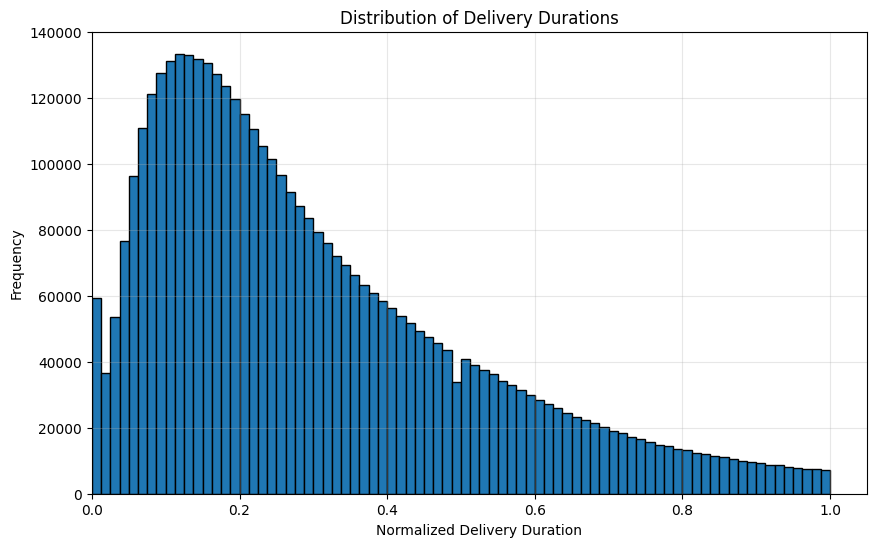

In [ ]:
# Histogram of delivery durations
plt.figure(figsize=(10, 6))
plt.hist(df['delivery_duration'], bins=80, edgecolor='black')
plt.title('Distribution of Delivery Durations')
plt.xlabel('Normalized Delivery Duration')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.xlim(left=0)


plt.show()

In [ ]:
df.columns

Index(['order_id', 'region_id', 'courier_id', 'lng', 'lat', 'aoi_id',
       'accept_time', 'accept_gps_time', 'accept_gps_lng', 'accept_gps_lat',
       'delivery_time', 'delivery_gps_time', 'delivery_gps_lng',
       'delivery_gps_lat', 'ds', 'delivery_duration', 'duration_gps_time',
       'distance', 'city_Hangzhou', 'city_Jilin', 'city_Shanghai',
       'city_Yantai', 'aoi_type_1', 'aoi_type_2', 'aoi_type_3', 'aoi_type_4',
       'aoi_type_5', 'aoi_type_6', 'aoi_type_7', 'aoi_type_8', 'aoi_type_9',
       'aoi_type_10', 'aoi_type_11', 'aoi_type_12', 'aoi_type_13',
       'aoi_type_14', 'aoi_type_15'],
      dtype='object')

In [ ]:
df.shape

(4193458, 37)

In [ ]:
df.iloc[:5, :17]

,order_id,region_id,courier_id,lng,lat,aoi_id,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,delivery_duration,duration_gps_time
0,2031782,10,73,108.71571,30.90228,50,2024-10-22 10:26:00,2024-10-22 10:26:00,108.71826,30.95587,2024-10-22 17:04:00,2024-10-22 17:04:00,108.66361,30.96702,1022,1.000000,0 days 06:38:00
6,4481765,10,3605,108.71605,30.90410,50,2024-09-30 10:00:00,2024-09-30 10:00:00,108.71824,30.95583,2024-09-30 16:38:00,2024-09-30 16:38:00,108.71429,30.90416,930,1.000000,0 days 06:38:00
20,3098203,10,1635,108.71797,30.94364,296,2024-07-10 08:33:00,2024-07-10 08:33:00,108.71801,30.95637,2024-07-10 13:24:00,2024-07-10 13:24:00,108.71809,30.94260,710,0.731156,0 days 04:51:00
21,356619,10,1635,108.71979,30.94130,296,2024-09-09 09:04:00,2024-09-09 09:04:00,108.71803,30.95629,2024-09-09 10:49:00,2024-09-09 10:49:00,108.71970,30.94235,909,0.263819,0 days 01:45:00
22,1484207,10,1635,108.72106,30.94164,296,2024-10-19 08:29:00,2024-10-19 08:29:00,108.71820,30.95598,2024-10-19 10:11:00,2024-10-19 10:11:00,108.72307,30.94201,1019,0.256281,0 days 01:42:00


In [ ]:
df.iloc[:5,17:]

,distance,city_Hangzhou,city_Jilin,city_Shanghai,city_Yantai,aoi_type_1,aoi_type_2,aoi_type_3,aoi_type_4,aoi_type_5,aoi_type_6,aoi_type_7,aoi_type_8,aoi_type_9,aoi_type_10,aoi_type_11,aoi_type_12,aoi_type_13,aoi_type_14,aoi_type_15
0,0.000416,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,0.000387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
20,0.000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
21,0.000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
22,0.000110,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.to_csv('cleaned_delivery_data.csv', index=False)